In [188]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [15, 8]

In [200]:
sales = [266.0,
145.9,
183.1,
119.3,
180.3,
168.5,
231.8,
224.5,
192.8,
122.9,
336.5,
185.9,
194.3,
149.5,
210.1,
273.3,
191.4,
287.0,
226.0,
303.6,
289.9,
421.6,
264.5,
342.3,
339.7,
440.4,
315.9,
439.3,
401.3,
437.4,
575.5,
407.6,
682.0,
475.3,
581.3,
646.9,]

In [201]:
df = pd.DataFrame({
    'sales': sales
})

In [202]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
def score(y_true, y_pred, name):
    y_true = y_true[2:]
    y_pred = y_pred[2:]
    return pd.Series({
        'mae': mean_absolute_error(y_true, y_pred),
        'rmse': math.sqrt(mean_squared_error(y_true, y_pred))
    }).rename(name)

In [203]:
scores = pd.DataFrame(columns=['mae', 'rmse'])

<AxesSubplot:>

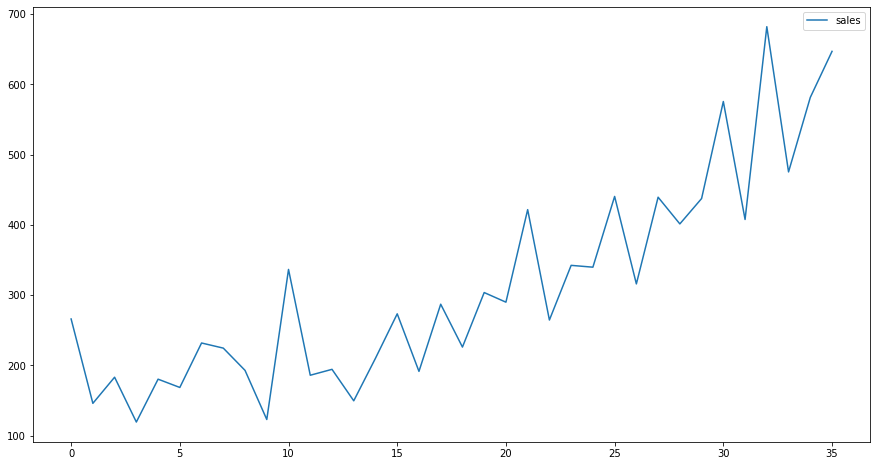

In [204]:
df.plot()

# Moving average

In [205]:
df['moving_average_4'] = df.sales.shift(1).rolling(4, min_periods=2).mean()

<AxesSubplot:>

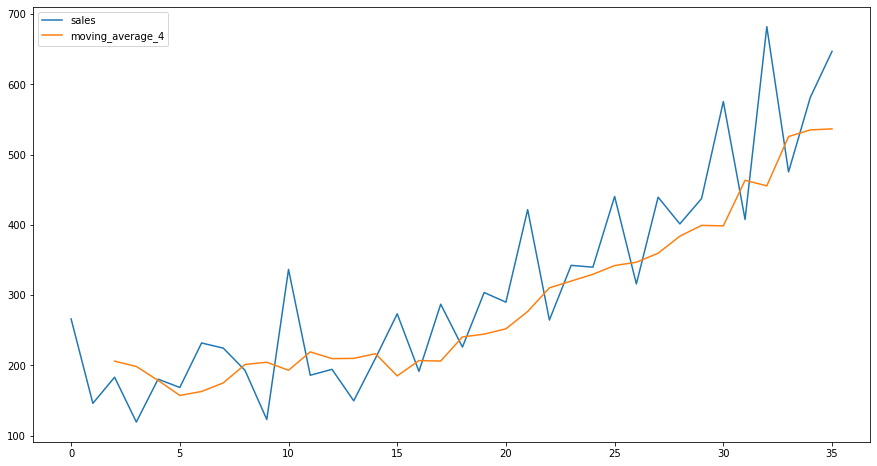

In [206]:
df.plot()

In [207]:
scores = scores.append(score(df.sales, df.moving_average_4, 'moving_average_4'))
scores

,mae,rmse
moving_average_4,59.781863,78.8277


# Weighted moving average

In [208]:
weights = np.array([0.5, 0.25, 0.25, .1])
sum_weights = np.sum(weights)

df[f'weighted_ma{len(weights)}'] = df.sales.shift(1)\
    .rolling(window=len(weights), center=True, min_periods=1)\
    .apply(lambda x: np.sum(weights[:len(x)]*x) / weights[:len(x)].sum())


<AxesSubplot:>

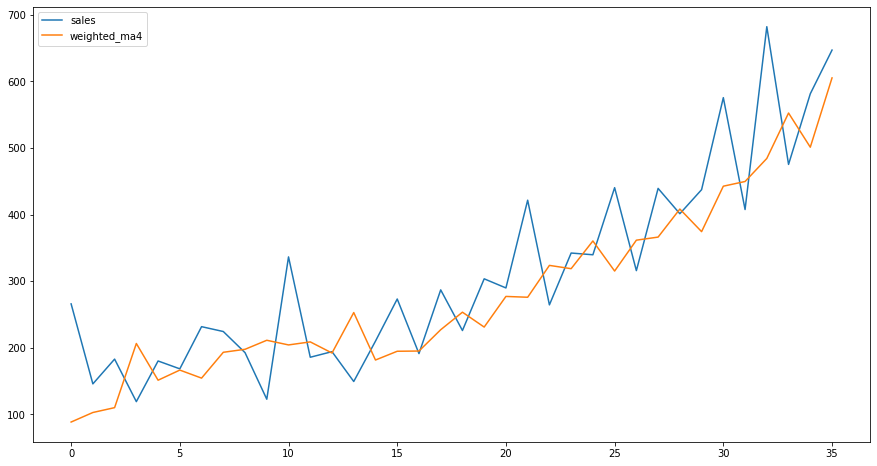

In [209]:
df[['sales',f'weighted_ma{len(weights)}']].plot()

In [210]:
scores = scores.append(score(df.sales, df.weighted_ma4, 'weightes_ma_4'))
scores

,mae,rmse
moving_average_4,59.781863,78.827700
weightes_ma_4,60.915775,76.581449


__Note:__ it may get better results when weights are found be gradient optimization

<AxesSubplot:>

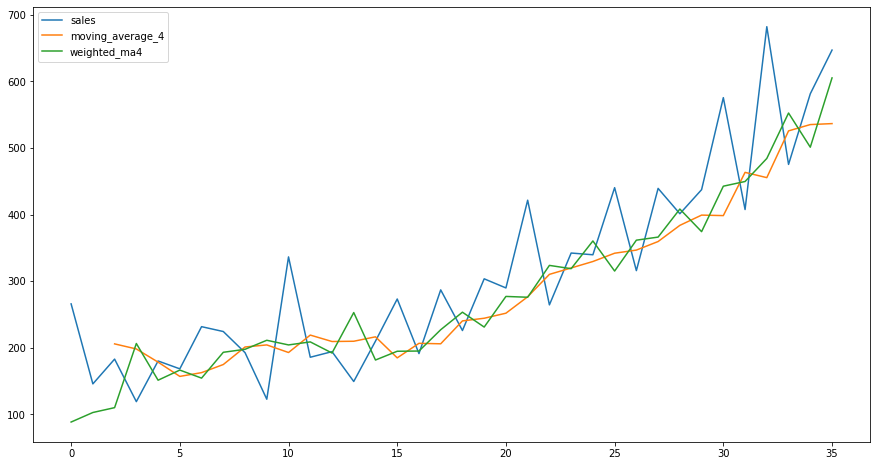

In [211]:
df.plot()

# Exponential smoothing